# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info
Latitude = []
Temperature = []
Humidity = []
Cloudiness = []
WindSpeed = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"

query_url = f"{url}appid={api_key}&units={temp_units}&q="
query_url
# print(query_url)

# Loop through the list of cities and perform a request for data on each
for city in cities:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
         
        try:
            city_id = weather_json["id"]
            city_name = weather_json["name"]

        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
        
            response = requests.get(query_url + city).json()
    
        # append all required data from json during each loop
            Latitude.append(weather_json['coord']['lat'])
            Temperature.append(weather_json['main']['temp'])
            Humidity.append(weather_json['main']['humidity'])
            Cloudiness.append(weather_json['clouds']['all'])
            WindSpeed.append(weather_json['wind']['speed'])
        
            print(f"Finding city info: {city_name} and City ID# is: {city_id} ")
        
        except KeyError:
            # print exception when city not found
            print("City missing... skipping.")
            continue
        
print("------------------------")
print("Data retrival complete")
print("------------------------")

Finding city info: Umluj and City ID# is: 100926 
Finding city info: Saskylakh and City ID# is: 2017155 
Finding city info: Hobart and City ID# is: 2163355 
Finding city info: Tasiilaq and City ID# is: 3424607 
Finding city info: Cape Town and City ID# is: 3369157 
Finding city info: Ushuaia and City ID# is: 3833367 
Finding city info: Kamaishi and City ID# is: 2112444 
Finding city info: Bethel and City ID# is: 5282297 
Finding city info: Atuona and City ID# is: 4020109 
Finding city info: Punta Arenas and City ID# is: 3874787 
Finding city info: Katsuura and City ID# is: 2112309 
Finding city info: Port-Cartier and City ID# is: 6111696 
Finding city info: Bushenyi and City ID# is: 234081 
Finding city info: Iguape and City ID# is: 3461465 
Finding city info: Airai and City ID# is: 1651810 
Finding city info: Salym and City ID# is: 1493162 
Finding city info: Albany and City ID# is: 5106841 
Finding city info: Omboué and City ID# is: 2396853 
Finding city info: Ulaangom and City ID# i

Finding city info: Saint-Philippe and City ID# is: 935215 
Finding city info: Sarany and City ID# is: 498696 
City missing... skipping.
Finding city info: Cururupu and City ID# is: 3401148 
Finding city info: Senekal and City ID# is: 956507 
City missing... skipping.
Finding city info: La Maddalena and City ID# is: 3175217 
Finding city info: Durant and City ID# is: 4535414 
Finding city info: Ingham and City ID# is: 4997130 
Finding city info: Novokizhinginsk and City ID# is: 2018930 
Finding city info: Hithadhoo and City ID# is: 1282256 
Finding city info: Kalisz and City ID# is: 3096880 
Finding city info: East London and City ID# is: 1006984 
Finding city info: Oakdale and City ID# is: 5039978 
Finding city info: Şırnak and City ID# is: 300640 
Finding city info: Necochea and City ID# is: 3430443 
Finding city info: Kloulklubed and City ID# is: 7671223 
Finding city info: Kavaratti and City ID# is: 1267390 
Finding city info: Nanortalik and City ID# is: 3421765 
Finding city info: 

Finding city info: Lata and City ID# is: 2738381 
Finding city info: Włocławek and City ID# is: 3081741 
Finding city info: El Playón and City ID# is: 3792399 
Finding city info: Beyneu and City ID# is: 610298 
Finding city info: Hokitika and City ID# is: 2206894 
Finding city info: Muli and City ID# is: 1337617 
Finding city info: Cabedelo and City ID# is: 3404558 
Finding city info: Saldanha and City ID# is: 3361934 
Finding city info: Maniitsoq and City ID# is: 3421982 
Finding city info: Dutse and City ID# is: 2344245 
City missing... skipping.
Finding city info: Fukuechō and City ID# is: 1863997 
Finding city info: São Miguel do Araguaia and City ID# is: 3448455 
Finding city info: La Ronge and City ID# is: 6050066 
Finding city info: Vao and City ID# is: 2137773 
Finding city info: Maragogi and City ID# is: 3395458 
Finding city info: Pochutla and City ID# is: 3517970 
Finding city info: Naze and City ID# is: 1855540 
Finding city info: Bonito and City ID# is: 3469294 
Finding ci

Finding city info: Verkhnyaya Inta and City ID# is: 1487332 
Finding city info: Moranbah and City ID# is: 6533368 
Finding city info: Lishui and City ID# is: 1803245 
Finding city info: La Sarre and City ID# is: 6050194 
Finding city info: Cravo Norte and City ID# is: 3685702 
Finding city info: Marsá Maţrūḩ and City ID# is: 352733 
Finding city info: Arrondissement de Lons-le-Saunier and City ID# is: 2997625 
Finding city info: Mossamedes and City ID# is: 3347019 
Finding city info: Varhaug and City ID# is: 3132644 
Finding city info: Staryy Nadym and City ID# is: 1490918 
Finding city info: Bonthe and City ID# is: 2409914 
Finding city info: Moultrie and City ID# is: 4210397 
Finding city info: Kutum and City ID# is: 371745 
Finding city info: Makkah al Mukarramah and City ID# is: 104515 
Finding city info: Holme and City ID# is: 2624652 
Finding city info: Hammerfest and City ID# is: 779683 
Finding city info: Klaksvík and City ID# is: 2618795 
Finding city info: Sijunjung and City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "Latitude": Latitude,
    "Temp": Temperature,
    "Humidity": Humidity,
    "Clouds (%)": Cloudiness,
    "Wind (MPH)": WindSpeed
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,Latitude,Temp,Humidity,Clouds (%),Wind (MPH)
0,25.02,78.62,19,0,0.65
1,71.92,-4.86,95,39,4.32
2,-42.88,64.09,93,75,1.12
3,65.61,19.40,73,31,6.93
4,-33.93,66.99,93,20,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# Date of analysis
TodaysDate = time.strftime("%m/%d/%Y")
TodaysDate

'03/05/2020'

#### Latitude vs. Temperature Plot

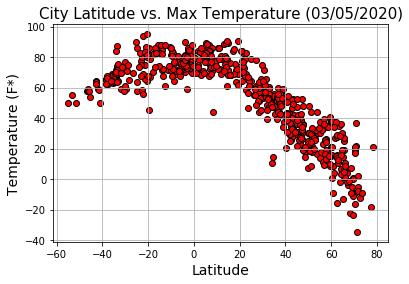

In [7]:
# graph, with title and date for lat vs max temp

plt.scatter(weather_data["Latitude"], weather_data["Temp"], facecolors="red", edgecolors="black")

# Graph titles
plt.title('City Latitude vs. Max Temperature ('+ TodaysDate +')', fontsize=15)
plt.ylabel('Temperature (F*)', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.grid(True)
          
# Save the figure
plt.savefig("CitiesTemps.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

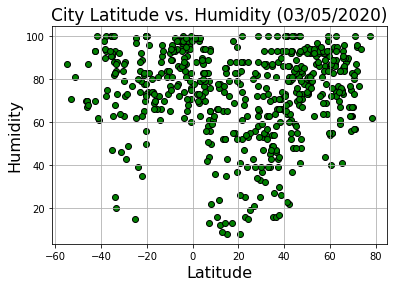

In [15]:
# graph, with title and date for lat vs humidity

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", edgecolors="black")

# Graph titles
plt.title('City Latitude vs. Humidity ('+ TodaysDate +')', fontsize=17)
plt.ylabel('Humidity', fontsize=16)
plt.xlabel('Latitude', fontsize=16)
plt.grid(True)
          
# Save the figure
plt.savefig("CitiesHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

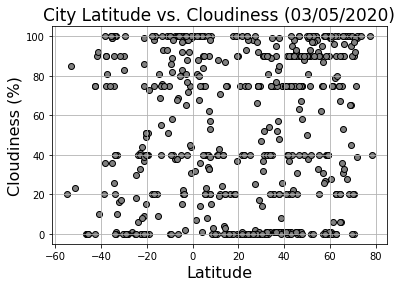

In [16]:
# graph, with title and date for lat vs cloudiness

plt.scatter(weather_data["Latitude"], weather_data["Clouds (%)"], facecolors="gray", edgecolors="black")

# Graph titles
plt.title('City Latitude vs. Cloudiness ('+ TodaysDate +')', fontsize=17)
plt.ylabel('Cloudiness (%)', fontsize=16)
plt.xlabel('Latitude', fontsize=16)
plt.grid(True)
          
# Save the figure
plt.savefig("CitiesCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

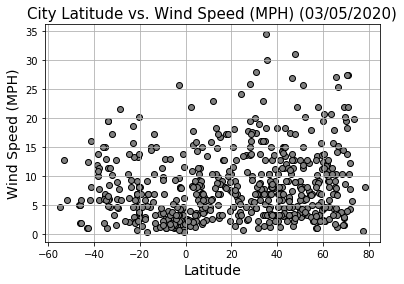

In [17]:
# graph, with title and date for lat vs wind speed

plt.scatter(weather_data["Latitude"], weather_data["Wind (MPH)"], facecolors="gray", edgecolors="black")

# Graph titles
plt.title('City Latitude vs. Wind Speed (MPH) ('+ TodaysDate +')', fontsize=15)
plt.ylabel('Wind Speed (MPH)', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.grid(True)
          
# Save the figure
plt.savefig("CitiesWindSpeed.png")

# Show plot
plt.show()

In [1]:
html_table = weather_data.to_html()
html_table

NameError: name 'df' is not defined